## Surprise Housing Data Analytics Regression Model - Advanced Regression

### Problem 
A US-based housing company named Surprise Housing company wants to use data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The goal is to build a regression model using regularisation in order to predict the actual value of the prospective properties using a data set comprised of sale details of houses in Australia. 

As a result, The company wants to understand which variables are significant in predicting the price of a house and how well those variables describe the price of a house.

### Steps for Solution:
- Analysing Data
- Data Cleaning and Feature Selection
- Build model using Advanced Linear Regression
- Build model using Ridge
- Build model using Lasso


In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

### STEP-1: Analysisng  DATA 

In [2]:
# Read
data = pd.read_csv("SPTrain.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### STEP-2: Data Cleaninig , Feature Selection

#### Observed that the below columns are Categorical and Non-Ordinal type of columns
MSZoning ,
Street ,
Alley ,
LotShape,
LandContour,
LotConfig,
LandSlope,
Neighborhood,
Condition1,
Condition2 ,  
BldgType,
HouseStyle,
RoofStyle,
RoofMatl,
Exterior1st,
Exterior2nd ,
MasVnrType,
Heating,
CentralAir,
Electrical,
Functional,
GarageType,
MiscFeature,
SaleType,
SaleCondition,
Foundation

#### Dropping off below columns from initial analysis
- Utilities: Out of 1460 records, It has single value of "AllPub" for 1459 number of records
- Alley: Only 90 of the records have value. Remaining records do not have value.
- PoolQC: 1453 records are missing data
- MiscFeature: 1406 records are missing data.

In [5]:
# As there are more null values for below columns dropping off them
data = data.drop(['Alley','PoolQC','MiscFeature','Utilities'], axis=1)

#### Identify the columns that have null values

In [6]:

# Print columns with null values and their data types
for column in data.columns:
    if data[column].isnull().any():
        print(f" '{column}' \t '{data[column].dtype}'.")


 'LotFrontage' 	 'float64'.
 'MasVnrType' 	 'object'.
 'MasVnrArea' 	 'float64'.
 'BsmtQual' 	 'object'.
 'BsmtCond' 	 'object'.
 'BsmtExposure' 	 'object'.
 'BsmtFinType1' 	 'object'.
 'BsmtFinType2' 	 'object'.
 'Electrical' 	 'object'.
 'FireplaceQu' 	 'object'.
 'GarageType' 	 'object'.
 'GarageYrBlt' 	 'float64'.
 'GarageFinish' 	 'object'.
 'GarageQual' 	 'object'.
 'GarageCond' 	 'object'.
 'Fence' 	 'object'.


### NUMERICAL Data Processing

In [7]:
# Garage Built year might be applicable for all houses. So filling with 0s
data['GarageYrBlt'].fillna(0, inplace=True)

# As LotFrontage field might not be practical to have 0 steps in front of the house, filled missing values with median
median_value = data.LotFrontage.median()
data.LotFrontage.fillna(median_value, inplace=True)

# Masonry Veneer Area might be applicable for all houses. So filling with 0s
data['MasVnrArea'].fillna(0, inplace=True)


In [8]:
data.shape

(1460, 77)

#### Prepare separate numeric dataframe

In [9]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# dropping MSSubClass, OverallQual ,OverallCond as they are categorical though the values are numerical
data_numeric = data_numeric.drop(['MSSubClass','OverallQual','OverallCond'], axis=1)
data_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
## Check the Correlations among columns
cor = data_numeric.corr()
cor

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.009921,-0.033226,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
LotFrontage,-0.009921,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,-0.012713,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.015415,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


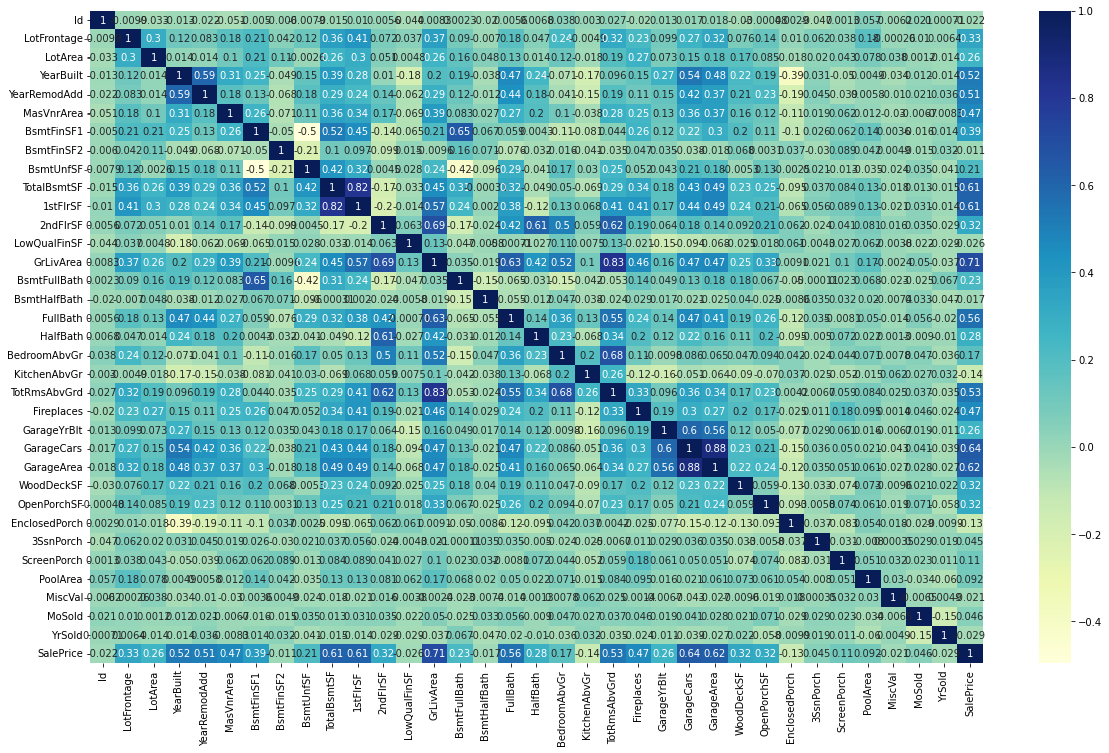

In [12]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### There is high correlation observed among below fields <br>
GarageCars(remove) and GarageArea  <br>
TotRmsAbvGrd and GrLivArea (remove) <br>
TotRmsAbvGrd and BedroomAbvGr (remove) <br>
Hence below columns are being removed

In [13]:
# dropping symboling and car_ID 
data_numeric = data_numeric.drop(['GrLivArea','BedroomAbvGr','GarageCars'], axis=1)
data_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
## Check the remaining numeric columns
data_numeric.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
# Check the value counts of below columns to understand the data population
for col in ['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2', 
            'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch']:
    print(data_numeric[col].value_counts())

0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64
0      1344
192       6
120       5
224       5
180       4
       ... 
175       1
178       1
40        1
185       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64
0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210

#### Understand the distrubution of Target variable SalePrice
Its observed that most of the price range is scatted around 200000

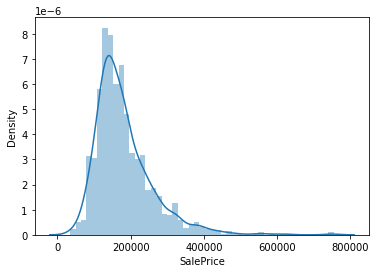

In [16]:

plt.figure()
sns.distplot(data_numeric['SalePrice'])
plt.show()

### CATEGORICAL  Data processing

Fill the gaps / missing values of categorical columns

In [17]:
# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' have NA there is 'No Basement'. 
# We can replace it with more meaning value to avoid any confusion
data['BsmtQual'].fillna('NA', inplace=True)
data['BsmtCond'].fillna('NA', inplace=True)
data['BsmtExposure'].fillna('NA', inplace=True)
data['BsmtFinType1'].fillna('NA', inplace=True)
data['BsmtFinType2'].fillna('NA', inplace=True)

data['FireplaceQu'].fillna('NA', inplace=True)

data['MasVnrType'].fillna('NA', inplace=True)

data['GarageType'].fillna('NA', inplace=True)    
data['GarageFinish'].fillna('NA', inplace=True)    
data['GarageQual'].fillna('NA', inplace=True)    
data['GarageCond'].fillna('NA', inplace=True)   
data['Fence'].fillna('NA', inplace=True)   

In [18]:
# Check the information of all the categorical fields
data_categorical = data.select_dtypes(include=['object'])
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   LotConfig      1460 non-null   object
 5   LandSlope      1460 non-null   object
 6   Neighborhood   1460 non-null   object
 7   Condition1     1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  RoofStyle      1460 non-null   object
 12  RoofMatl       1460 non-null   object
 13  Exterior1st    1460 non-null   object
 14  Exterior2nd    1460 non-null   object
 15  MasVnrType     1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [19]:
# MSSubClass: Though the values are numbers , the field actually represents categories
data['MSSubClass'].astype('category').value_counts()


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [20]:
# Similar to MSSubClass, OverallQual is also categorical column
data['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [21]:
# And thus OverallCond as well
data['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [22]:
## Converting the above three into Categorical type
data_categorical['MSSubClass'] = data['MSSubClass'].astype('object')
data_categorical['OverallQual'] = data['OverallQual'].astype('object')
data_categorical['OverallCond'] = data['OverallCond'].astype('object')

In [23]:
# Check the categorical data
data_categorical

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,RFn,TA,TA,Y,NA,WD,Normal,60,7,5
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,RFn,TA,TA,Y,NA,WD,Normal,20,6,8
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,RFn,TA,TA,Y,NA,WD,Normal,60,7,5
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Unf,TA,TA,Y,NA,WD,Abnorml,70,7,5
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,RFn,TA,TA,Y,NA,WD,Normal,60,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,RFn,TA,TA,Y,NA,WD,Normal,60,6,5
1456,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,Unf,TA,TA,Y,MnPrv,WD,Normal,20,6,6
1457,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,RFn,TA,TA,Y,GdPrv,WD,Normal,70,7,9
1458,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Unf,TA,TA,Y,NA,WD,Normal,20,5,6


In [24]:
data_categorical.keys()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond'],
      dtype='object')

#### Observed that the below columns are Categorical and Ordinal type of columns: 
ExterQual  , 
ExterCond ,
Foundation ,
BsmtQual ,
BsmtCond ,
BsmtExposure ,
BsmtFinType1 ,
BsmtFinType2 ,
HeatingQC ,
KitchenQual , 
FireplaceQu ,
GarageFinish ,
GarageQual ,
GarageCond ,
PavedDrive ,
PoolQC ,
Fence

##### Hence all of these categorical columns are transformed into numerics

In [25]:

# Replacing coded data with numerical equivalents
data_categorical['ExterQual'] = data_categorical['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data_categorical['ExterCond'] = data_categorical['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data_categorical['BsmtQual'] = data_categorical['BsmtQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_categorical['BsmtCond'] = data_categorical['BsmtCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_categorical['BsmtExposure'] = data_categorical['BsmtExposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data_categorical['BsmtFinType1'] = data_categorical['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data_categorical['BsmtFinType2'] = data_categorical['BsmtFinType2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data_categorical['HeatingQC'] = data_categorical['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data_categorical['GarageFinish'] = data_categorical['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data_categorical['GarageQual'] = data_categorical['GarageQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_categorical['GarageCond'] = data_categorical['GarageCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_categorical['FireplaceQu'] = data_categorical['FireplaceQu'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data_categorical['KitchenQual'] = data_categorical['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data_categorical['PavedDrive'] = data_categorical['PavedDrive'].map({'N':0,'P':1,'Y':2})
#data_categorical['PoolQC'] = data_categorical['PoolQC'].map({'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data_categorical['Fence'] = data_categorical['Fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
data_categorical['LotShape'] = data_categorical['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
data_categorical['LandSlope'] = data_categorical['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
#data_categorical['HouseStyle'] = data_categorical['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
data_categorical['CentralAir'] = data_categorical['CentralAir'].map({'N':0,'Y':1})
data_categorical['Functional'] = data_categorical['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})


In [26]:
data_categorical['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NA'], dtype=object)

In [27]:
#sns.pairplot(data=HousingData, x_vars=['MSZoning', 'Street', 'LotShape', 'LandContour'],y_vars=HousingData_categorical.keys(), kind='scatter')
#plt.show()

#### Plot the categorical data 

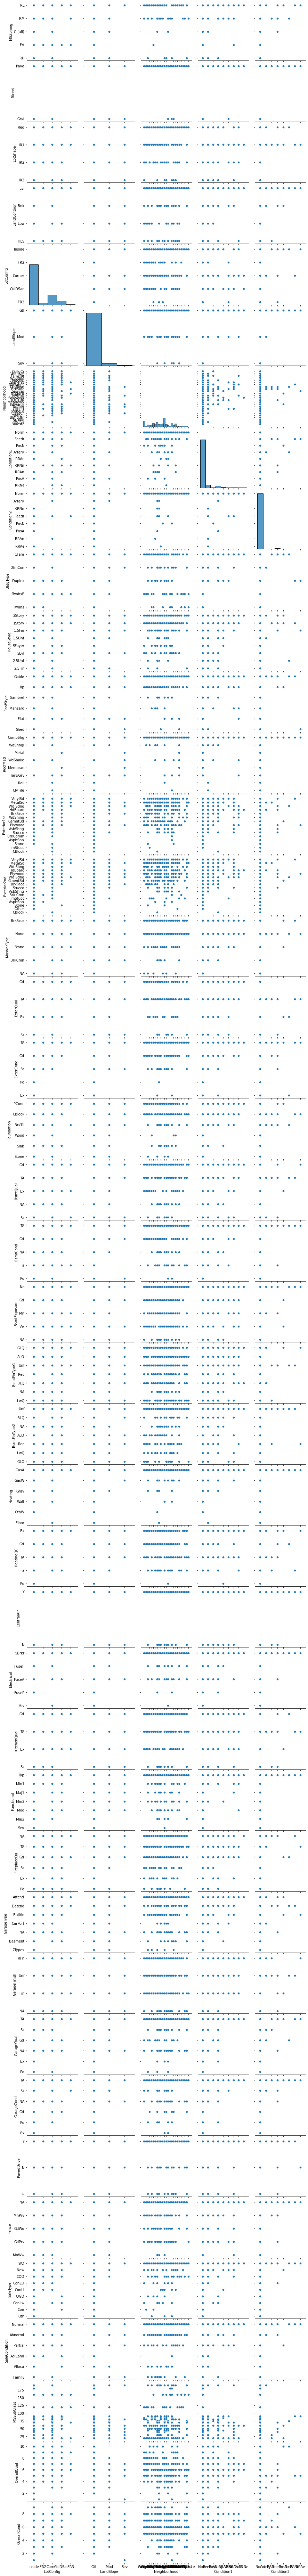

In [28]:
sns.pairplot(data=data, x_vars=['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2'],y_vars=data_categorical.keys(), kind='scatter')
plt.show()

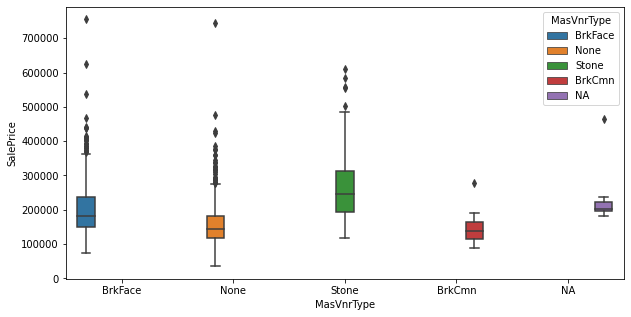

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', hue = 'MasVnrType', data = data)
plt.show()

In [30]:
data_categorical[['Condition2','Exterior1st','Exterior2nd']].describe()

,Condition2,Exterior1st,Exterior2nd
count,1460,1460,1460
unique,8,15,16
top,Norm,VinylSd,VinylSd
freq,1445,515,504


In [31]:
## As Condition2 has the same value of normal for 1445 records
## As Exterior2nd has same value of Exterio1st for majority records, droping off both
data_categorical.drop('Condition2', axis=1,inplace=True)
data_categorical.drop('Exterior2nd', axis=1,inplace=True)

In [32]:
data_categorical.keys()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond'],
      dtype='object')

In [33]:
data_categorical.describe()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence
count,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.942466,0.062329,2.39589,2.083562,3.489041,2.934932,1.630137,3.545890,1.247260,3.145205,0.934932,2.511644,0.158219,1.825342,1.715753,2.810274,2.808904,1.856164,0.565753
std,1.409156,0.276232,0.57428,0.351054,0.876478,0.552159,1.067391,2.107776,0.892332,0.959501,0.246731,0.663760,0.667698,1.810877,0.892831,0.722898,0.719685,0.496592,1.204483
min,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.00000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,3.000000,3.000000,2.000000,0.000000
50%,3.000000,0.000000,2.00000,2.000000,4.000000,3.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,0.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000
75%,3.000000,0.000000,3.00000,2.000000,4.000000,3.000000,2.000000,6.000000,1.000000,4.000000,1.000000,3.000000,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,0.000000
max,3.000000,2.000000,4.00000,4.000000,5.000000,4.000000,4.000000,6.000000,6.000000,4.000000,1.000000,4.000000,6.000000,5.000000,3.000000,5.000000,5.000000,2.000000,4.000000


In [34]:
cat_cols_df = data.select_dtypes(include=['object'])
cat_cols_df.describe(include='all')

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,5,3,25,9,8,5,...,7,6,7,4,6,6,3,5,9,6
top,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,Typ,NA,Attchd,Unf,TA,TA,Y,NA,WD,Normal
freq,1151,1454,925,1311,1052,1382,225,1260,1445,1220,...,1360,690,870,605,1311,1326,1340,1179,1267,1198


In [35]:
# Observe the stats of these columns
cat_cols_df[['RoofMatl','Street','SaleType','Condition1','Electrical','SaleCondition']].describe(include='all')

,RoofMatl,Street,SaleType,Condition1,Electrical,SaleCondition
count,1460,1460,1460,1460,1459,1460
unique,8,2,9,9,5,6
top,CompShg,Pave,WD,Norm,SBrkr,Normal
freq,1434,1454,1267,1260,1334,1198


In [36]:
# It is clear from the above output that for RoofMatl, majority of values belong to one label only. We can safely drop them

data_categorical.drop(['RoofMatl','Street','SaleType','Condition1','Electrical','SaleCondition'], axis=1,inplace=True)

In [37]:
# Its the similar case with GarageType
data_categorical.drop(['GarageType'], axis=1,inplace=True)

In [38]:
# Last check for NaN values

data_categorical.isnull().sum()

MSZoning        0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
BldgType        0
HouseStyle      0
RoofStyle       0
Exterior1st     0
MasVnrType      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
Fence           0
MSSubClass      0
OverallQual     0
OverallCond     0
dtype: int64

In [39]:
# Imputing missing value with mode, as the feature is categorical type.
#HousingData_categorical.Electrical.fillna(HousingData_categorical.Electrical.mode()[0], inplace=True)

In [40]:
# Creating Dummy variables
cols_for_dummy = ['MSZoning', 'LotShape','LandContour','LotConfig','LandSlope',
                            'Neighborhood','BldgType','HouseStyle',
                            'RoofStyle',  'Exterior1st', 'MasVnrType',
                            'Heating','CentralAir','Functional',   'Foundation']
cols_for_dummy

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'Heating',
 'CentralAir',
 'Functional',
 'Foundation']

In [41]:
house_cat_dummies = pd.get_dummies(data_categorical[cols_for_dummy],dtype=int,drop_first=True)
house_cat_dummies

,LotShape,LandSlope,CentralAir,Functional,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,3,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1456,3,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1457,3,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1458,3,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [42]:
# Adding the dummy variables to the original dataframe
data_categorical = pd.concat([data_categorical,house_cat_dummies], axis=1)

# Dropping the categorical columns
data_categorical = data_categorical.drop(cols_for_dummy, axis=1)
data_categorical.shape

(1460, 97)

In [43]:
house_cat_dummies.columns

Index(['LotShape', 'LandSlope', 'CentralAir', 'Functional', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5

In [44]:
# Append new dummy variables to the Dataset

#list(Housing_categorical.columns)
# Drop the Categorical equivalent columns as Dummy variables are created for them
### house_cat_dummies.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
#       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
#       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
#       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
#       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass',
#       'OverallQual', 'OverallCond'], inplace=True, axis = 1)
###

In [45]:
data_numeric.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [46]:
data_clean = pd.concat([data_numeric, data_categorical], axis = 1)


In [47]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 97 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ExterQual             1460 non-null   int64 
 1   ExterCond             1460 non-null   int64 
 2   BsmtQual              1460 non-null   int64 
 3   BsmtCond              1460 non-null   int64 
 4   BsmtExposure          1460 non-null   int64 
 5   BsmtFinType1          1460 non-null   int64 
 6   BsmtFinType2          1460 non-null   int64 
 7   HeatingQC             1460 non-null   int64 
 8   KitchenQual           1460 non-null   int64 
 9   FireplaceQu           1460 non-null   int64 
 10  GarageFinish          1460 non-null   int64 
 11  GarageQual            1460 non-null   int64 
 12  GarageCond            1460 non-null   int64 
 13  PavedDrive            1460 non-null   int64 
 14  Fence                 1460 non-null   int64 
 15  MSSubClass            1460 non-null   

In [48]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 129 entries, Id to Foundation_Wood
dtypes: float64(3), int32(79), int64(44), object(3)
memory usage: 1021.0+ KB


In [49]:
###### CONTINUE FROM BUILDING MODELS

In [50]:
def buildLRModel(X_train_param, y_train_param):
    X_train_sm = sm.add_constant(X_train_param)
    
    #create linear regression model using OLS
    lr = sm.OLS(y_train_param, X_train_sm)
    lr_model = lr.fit()
    return lr_model

In [51]:
def computeVIF (X_train_param):
    vif = pd.DataFrame()
    vif['Features'] = X_train_param.columns
    vif['VIF'] = [variance_inflation_factor(X_train_param.values, i) for i in range(X_train_param.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [52]:
### Creating training and test datasets
housing_training_set, housing_testing_set = train_test_split(data_clean, train_size=0.7, random_state = 100)
print(housing_training_set.shape)
print(housing_testing_set.shape)

(1021, 129)
(439, 129)


In [53]:
#instantiate the object
scaler = StandardScaler()

numeric_cols_df = housing_training_set.select_dtypes(include=['int64', 'float64'])

#scale data
housing_training_set[numeric_cols_df.columns] = scaler.fit_transform(housing_training_set[numeric_cols_df.columns])
housing_training_set.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,3.479641e-17,-1.043892e-17,-7.655211e-17,6.419938e-16,-8.420732e-16,-6.611318e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,...,0.977473,0.012733,0.003918,0.000979,0.003918,0.428991,0.452498,0.017630,0.002938,0.001959
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.148462,0.112173,0.062500,0.031296,0.062500,0.495175,0.497982,0.131666,0.054153,0.044237
min,-1.731863e+00,-2.199712e+00,-8.747892e-01,-3.277260e+00,-1.698692e+00,-5.580245e-01,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.578243e-01,-4.333861e-01,-2.951529e-01,-5.715419e-01,-8.732432e-01,-5.580245e-01,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.146705e-03,-2.577250e-02,-9.559968e-02,5.539286e-02,4.377630e-01,-5.580245e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.761177e-01,3.818411e-01,9.919770e-02,9.463001e-01,9.233208e-01,2.857702e-01,5.675235e-01,-2.933126e-01,5.401208e-01,5.491756e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.705394e+00,1.102509e+01,1.987332e+01,1.276266e+00,1.214656e+00,7.986733e+00,1.117655e+01,8.338494e+00,3.951345e+00,1.100087e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# Creating y_train & X_train

y_train = housing_training_set.pop('SalePrice')
X_train = housing_training_set

In [55]:
# For RFE we will start with 25 features
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
rfe = RFE(linearModel)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 48),
 ('LotFrontage', False, 9),
 ('LotArea', False, 8),
 ('YearBuilt', False, 55),
 ('YearRemodAdd', False, 57),
 ('MasVnrArea', False, 7),
 ('BsmtFinSF1', False, 46),
 ('BsmtFinSF2', False, 58),
 ('BsmtUnfSF', False, 63),
 ('TotalBsmtSF', False, 29),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 28),
 ('BsmtFullBath', False, 15),
 ('BsmtHalfBath', False, 30),
 ('FullBath', False, 20),
 ('HalfBath', False, 21),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 25),
 ('Fireplaces', False, 27),
 ('GarageYrBlt', False, 3),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 40),
 ('OpenPorchSF', False, 34),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 31),
 ('ScreenPorch', False, 39),
 ('PoolArea', False, 64),
 ('MiscVal', False, 54),
 ('MoSold', False, 44),
 ('YrSold', False, 32),
 ('ExterQual', False, 26),
 ('ExterCond', False, 36),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 

In [56]:
# Creating X_train for RFE

selected_cols = X_train.columns[rfe.support_]
X_train_tmp = X_train[selected_cols]
X_train_rfe = X_train[selected_cols]
X_train_tmp.head()

,1stFlrSF,2ndFlrSF,KitchenAbvGr,GarageArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,GarageFinish,...,Exterior1st_Stone,Exterior1st_Stucco,MasVnrType_NA,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,0.511410,2.137583,-0.234155,0.867501,0.577925,0.123940,2.143653,1.138412,0.741868,0.320660,...,0,0,0,0,0,0,1,0,0,0
239,-0.931882,0.793638,-0.234155,-1.188045,-0.533302,-1.609519,-0.607084,-0.753845,-0.776063,-0.792924,...,0,0,0,0,0,1,0,0,0,0
986,-0.421449,0.667284,-0.234155,-1.023035,-0.533302,-1.609519,-0.607084,-1.226909,0.741868,-0.792924,...,0,0,0,0,0,1,0,0,0,0
1416,0.194590,1.609195,4.112612,0.414904,-0.533302,0.123940,-0.607084,-1.226909,-0.776063,-0.792924,...,0,0,0,0,0,0,1,0,0,0
390,-0.522027,0.143490,-0.234155,-0.414858,-0.533302,1.857399,-0.607084,-0.280781,-0.776063,-0.792924,...,0,0,0,0,0,0,0,0,0,0


In [57]:
lr_model = buildLRModel(X_train_tmp.astype(float), y_train)
print(lr_model.summary())

vif = computeVIF(X_train_tmp.astype(float))
print(vif.head(20))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     92.34
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:05:57   Log-Likelihood:                -442.24
No. Observations:                1021   AIC:                             1014.
Df Residuals:                     956   BIC:                             1335.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9664 

In [58]:
X_train_tmp = X_train_tmp.drop(['MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM'], axis=1)

lr_model = buildLRModel(X_train_tmp.astype(float), y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp.astype(float))
print(vif.head(20))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:05:57   Log-Likelihood:                -444.43
No. Observations:                1021   AIC:                             1011.
Df Residuals:                     960   BIC:                             1312.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6607 

In [59]:
X_train_tmp = X_train_tmp.drop(['OverallQual','LandContour_Lvl'], axis=1)

lr_model = buildLRModel(X_train_tmp.astype(float), y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp.astype(float))
print(vif.head(20))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     92.31
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:05:58   Log-Likelihood:                -488.04
No. Observations:                1021   AIC:                             1094.
Df Residuals:                     962   BIC:                             1385.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5960 

In [60]:
X_train_tmp = X_train_tmp.drop(['2ndFlrSF'], axis=1)

lr_model = buildLRModel(X_train_tmp.astype(float), y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp.astype(float))
print(vif.head(20))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     74.95
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          7.63e-312
Time:                        11:05:58   Log-Likelihood:                -584.39
No. Observations:                1021   AIC:                             1285.
Df Residuals:                     963   BIC:                             1571.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5470 

In [61]:
X_train_tmp = X_train_tmp.drop(['OverallCond'], axis=1)

lr_model = buildLRModel(X_train_tmp.astype(float), y_train)
print(lr_model.summary())
vif = computeVIF(X_train_tmp.astype(float))
print(vif.head(20))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     74.36
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          2.69e-308
Time:                        11:05:58   Log-Likelihood:                -595.49
No. Observations:                1021   AIC:                             1305.
Df Residuals:                     964   BIC:                             1586.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1345 

In [62]:
# Adding coefficient to X_train_tmp

X_train_sm = sm.add_constant(X_train_tmp)

y_train_pred = lr_model.predict(X_train_sm)

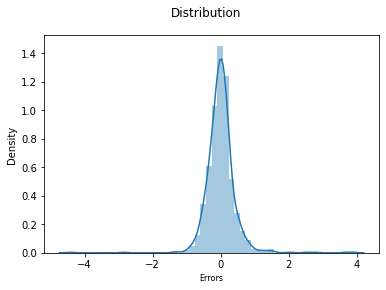

In [63]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Distribution', fontsize = 12)
plt.xlabel('Errors', fontsize = 8)
plt.show()

In [64]:
# Scaling test data

housing_test_tmp = housing_testing_set.copy(deep= True)

housing_test_tmp[numeric_cols_df.columns] = scaler.transform(housing_test_tmp[numeric_cols_df.columns])

# Creating y_test and X_test
y_test = housing_test_tmp.pop('SalePrice')
X_test = housing_test_tmp
X_test_rfe = X_test[selected_cols]

In [65]:
X_test = X_test[X_train_tmp.columns]
X_test.head()

,1stFlrSF,KitchenAbvGr,GarageArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,GarageFinish,LandContour_HLS,...,Exterior1st_Stone,Exterior1st_Stucco,MasVnrType_NA,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
1436,-0.765928,-0.234155,0.264038,-0.533302,0.123940,-0.607084,0.665348,-0.776063,-0.792924,0,...,0,0,0,0,0,0,1,0,0,0
57,-0.775986,-0.234155,0.438477,0.577925,0.123940,-0.607084,-1.226909,0.741868,0.320660,0,...,0,0,0,0,0,0,1,0,0,0
780,0.212191,-0.234155,-0.329996,0.577925,1.857399,-0.607084,-1.226909,-0.776063,1.434243,0,...,0,0,0,0,0,0,1,0,0,0
382,-0.577345,-0.234155,0.787354,0.577925,0.123940,1.226741,-1.226909,0.741868,0.320660,0,...,0,0,0,0,0,0,1,0,0,0
1170,-0.127259,-0.234155,-0.537436,-0.533302,0.123940,1.226741,0.665348,-0.776063,1.434243,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

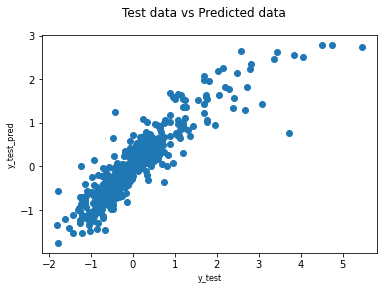

In [67]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test data vs Predicted data', fontsize = 12)
plt.xlabel('y_test', fontsize = 8)
plt.ylabel('y_test_pred', fontsize = 8)
plt.show()

In [68]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.8122417501646247


In [69]:
##Ridge Regression

In [70]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)     

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
print(model_cv.best_params_)

{'alpha': 6.0}


In [72]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.26058396  0.25682405 -0.02940615  0.09176823  0.10380442 -0.06213244
  0.1011688   0.06926396  0.11486654  0.05349343  0.1988642   0.03952626
  0.01351537  0.00349299  0.06313787 -0.0615971   0.03355589  0.03543462
  0.02261492  0.06505665 -0.02603188 -0.00583548 -0.00908305  0.0260261
  0.05402011 -0.07340964 -0.0100603  -0.03913766 -0.00846436 -0.03166988
  0.15782973  0.13809483 -0.03866926 -0.01434862  0.03990613  0.01826092
  0.02104572 -0.01045377 -0.06150027 -0.08111884  0.00452618  0.08989339
 -0.00274705 -0.00833754 -0.0020849   0.00992036  0.06246236 -0.0007816
 -0.00315681  0.05665049 -0.00255722  0.02167922 -0.02598782  0.00041979
 -0.00584466 -0.03722568  0.00900248 -0.00786621  0.01062522  0.00764176
  0.02835192  0.02569994  0.00128257  0.00107429]


In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_ridge_train = ridge.predict(X_train_rfe)
y_pred_ridge_test = ridge.predict(X_test_rfe)

In [74]:
r2_train_ridge = r2_score(y_train, y_pred_ridge_train)
r2_test_ridge = r2_score(y_test, y_pred_ridge_test)


print('R2 score (training) : ',r2_train_ridge)
print('R2 score (test) : ', r2_test_ridge)


rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
print('RMSE (train) : ', rmse_train_ridge)
print('RMSE (test) : ', rmse_test_ridge)

R2 score (training) :  0.8219087597694605
R2 score (test) :  0.8229500729588148
RMSE (train) :  0.4220085783850128
RMSE (test) :  0.42699218587568816


In [75]:
## Lasso Regression

In [76]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [78]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.01)

In [79]:
lasso.coef_

array([ 0.29580118,  0.29044509, -0.0319388 ,  0.07787727,  0.09104054,
       -0.04883732,  0.10877628,  0.0616664 ,  0.11329693,  0.05089721,
        0.20016657,  0.0326619 ,  0.        , -0.        ,  0.00220637,
       -0.09360774,  0.        ,  0.        ,  0.        ,  0.01870211,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.01532389, -0.        , -0.        , -0.        , -0.        ,
        0.33122097,  0.22516441, -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.01597617,
        0.        ,  0.13136016, -0.        , -0.        , -0.        ,
        0.        ,  0.00484181, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ])

In [80]:
y_pred_lasso_train = lasso.predict(X_train_rfe)
y_pred_lasso_test = lasso.predict(X_test_rfe)
r2_train_lasso = r2_score(y_train, y_pred_lasso_train)
r2_test_lasso = r2_score(y_test, y_pred_lasso_test)


print('R2 score (training) : ',r2_train_lasso)
print('R2 score (test) : ', r2_test_lasso)


rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
print('RMSE (train) : ', rmse_train_lasso)
print('RMSE (test) : ', rmse_test_lasso)

R2 score (training) :  0.8204577823758752
R2 score (test) :  0.8181777134174613
RMSE (train) :  0.42372422355126793
RMSE (test) :  0.43270868172842397
